# Grupo
1. João Victor Assaoka Ribeiro
2. Tales Miguel Machado Pereira

# **Lista de exercícios 2**: Modelo Probabilístico de Regressão Linear

Prof. Dr. Rodrigo Colnago Contreras <br />
contreras@unifesp.br

Para a condução das práticas computacionais, é necessário instalar a biblioteca ```yfinance```:

In [4]:
%pip install yfinance --upgrade --quiet

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Sugere-se utilizar a função abaixo para confeccionar o dataframe com os ativos financeiros considerados.

In [5]:
import yfinance as yf
import pandas as pd

def montar_dataframe_yfinance(inicio='2023-04-01', fim='2024-04-01'):
    ativos = {
        'BTC': 'BTC-USD', # Bitcoin
        'ETH': 'ETH-USD', # Etherium
        'SP500': '^GSPC', # Standard & Poor's 500, ou simplesmente S&P, trata-se de um índice composto por quinhentos ativos cotados nas bolsas de NYSE ou NASDAQ
        'DXY': 'DX-Y.NYB' # Índice do dolar americano
    }

    dfs = []
    for nome, ticker in ativos.items():
        print(f"\nBaixando dados de {nome} ({ticker})...")
        try:
            df_temp = yf.download(ticker, start=inicio, end=fim)
            if 'Close' not in df_temp.columns:
                print(f"⚠️ Dados indisponíveis para {ticker}. Ignorando.")
                continue
            df_temp = df_temp[['Close']].rename(columns={'Close': nome})
            df_temp['date'] = df_temp.index.date
            dfs.append(df_temp.reset_index(drop=True))
        except Exception as e:
            print(f"❌ Erro ao baixar {ticker}: {e}")

    if not dfs:
        raise ValueError("❌ Nenhum dado foi carregado com sucesso.")

    df_final = dfs[0]
    for df in dfs[1:]:
        df_final = pd.merge(df_final, df, on='date', how='inner')

    return df_final


Exemplo de coleta de ativos com a ```yfinance```:

In [6]:
df_ativos = montar_dataframe_yfinance()
df_ativos

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Baixando dados de BTC (BTC-USD)...

Baixando dados de ETH (ETH-USD)...

Baixando dados de SP500 (^GSPC)...

Baixando dados de DXY (DX-Y.NYB)...


Price,BTC,date,ETH,SP500,DXY
Ticker,BTC-USD,,ETH-USD,^GSPC,DX-Y.NYB
0,27790.220703,2023-04-03,1810.297119,4124.509766,102.089996
1,28168.089844,2023-04-04,1871.005127,4100.600098,101.589996
2,28177.984375,2023-04-05,1909.114014,4090.379883,101.849998
3,28044.140625,2023-04-06,1872.922607,4105.020020,101.820000
4,29652.980469,2023-04-10,1911.207520,4109.109863,102.580002
...,...,...,...,...,...
244,63778.761719,2024-03-22,3333.687988,5234.180176,104.430000
245,69958.812500,2024-03-25,3590.883789,5218.189941,104.230003
246,69987.835938,2024-03-26,3587.504883,5203.580078,104.290001


In [7]:
df_ativos = df_ativos.set_index('date')
df_ativos

Price,BTC,ETH,SP500,DXY
Ticker,BTC-USD,ETH-USD,^GSPC,DX-Y.NYB
date,,,,
2023-04-03,27790.220703,1810.297119,4124.509766,102.089996
2023-04-04,28168.089844,1871.005127,4100.600098,101.589996
2023-04-05,28177.984375,1909.114014,4090.379883,101.849998
2023-04-06,28044.140625,1872.922607,4105.020020,101.820000
2023-04-10,29652.980469,1911.207520,4109.109863,102.580002
...,...,...,...,...
2024-03-22,63778.761719,3333.687988,5234.180176,104.430000
2024-03-25,69958.812500,3590.883789,5218.189941,104.230003


## **Exercício 1:** Quais ativos dentre o preço de fechamento do bitcoin, da etherium, da SP500 e da DXY correlacionam-se de maneira aproximadamente linear?

**Dica**: Analise o *scatter plot* destes ativos.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns 

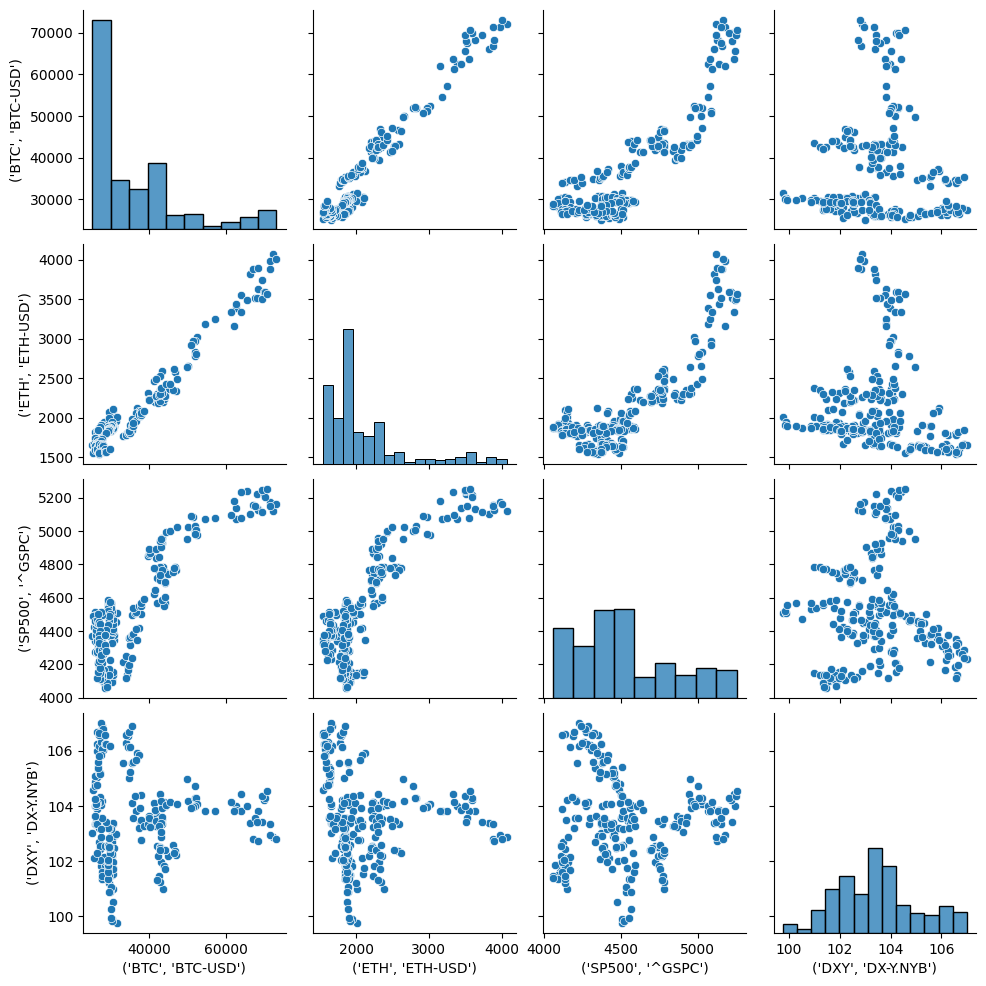

In [9]:
sns.pairplot(data=df_ativos)
plt.show()

In [10]:
df_ativos.corr("pearson").style.background_gradient(cmap='coolwarm', axis=None)

,Price,BTC,ETH,SP500,DXY
,Ticker,BTC-USD,ETH-USD,^GSPC,DX-Y.NYB
Price,Ticker,,,,
BTC,BTC-USD,1.000000,0.972717,0.878024,0.006601
ETH,ETH-USD,0.972717,1.000000,0.838600,-0.098808
SP500,^GSPC,0.878024,0.838600,1.000000,-0.018277
DXY,DX-Y.NYB,0.006601,-0.098808,-0.018277,1.000000


Podemos observar que BTC, ETH e SP500 possuem certa correlação linear entre si, enquanto o DXY não possui correlação linear com nenhum dos outros ativos. Em especial, o BTC e o ETH possuem uma correlação linear muito forte entre si, parecendo de fato linear. A relação entre o BTC e o ETH com o SP500 não parece tão linear graficamente, e sim quadrática.

## **Exercício 2:** Calcule a reta que descreve o preço de fechamento do BTC em função do preço de fechamento da ETH utilizando um MPRL determinado pelo método de mínimos quadrados. Analise a qualidade das métricas numéricas e visuais dessa aproximação.

**Dica:** Utilize as funções confeccionadas em sala de aula.

In [11]:
import numpy as np

In [19]:
def analise_qualidade_regressao(X, Y, caso):
    n = len(X)
    sum_x = np.sum(X)
    sum_y = np.sum(Y)
    sum_x2 = np.sum(X**2)
    sum_xy = np.sum(X * Y)

    # Sistema normal: A * beta = b
    A = np.array([[n, sum_x], [sum_x, sum_x2]])
    b = np.array([sum_y, sum_xy])
    beta_0, beta_1 = np.linalg.solve(A, b)

    # Previsões
    Y_hat = beta_0 + beta_1 * X
    Y_bar = np.mean(Y)

    # SQE: Soma dos Quadrados dos Erros (não explicada)
    SQE = np.sum((Y - Y_hat)**2)

    # STQT: Soma Total dos Quadrados (total)
    STQT = np.sum((Y - Y_bar)**2)

    # SQR: Soma dos Quadrados da Regressão (explicada)
    SQR = STQT - SQE

    # R²
    R2 = SQR / STQT

    # Impressão dos resultados
    print(f"🔎 Análise do caso {caso}")
    print(f"  β̂₀ = {beta_0:.4f}, β̂₁ = {beta_1:.4f}")
    print(f"  SQE   = {SQE:.4f}")
    print(f"  STQT  = {STQT:.4f}")
    print(f"  SQR   = {SQR:.4f}")
    print(f"  R²    = {R2:.4f}")
    print("  Interpretação:", end=" ")

    if R2 > 0.8:
        print("O modelo explica muito bem a variação de Y.")
    elif R2 > 0.5:
        print("O modelo explica razoavelmente a variação de Y.")
    elif R2 > 0.2:
        print("O modelo tem pouca capacidade explicativa.")
    else:
        print("O modelo linear praticamente não explica a variação de Y.")
    print()
    return beta_0, beta_1


🔎 Análise do caso BTC vs ETH
  β̂₀ = 460.9347, β̂₁ = 0.0456
  SQE   = 4338472.6247
  STQT  = 80609190.9417
  SQR   = 76270718.3170
  R²    = 0.9462
  Interpretação: O modelo explica muito bem a variação de Y.



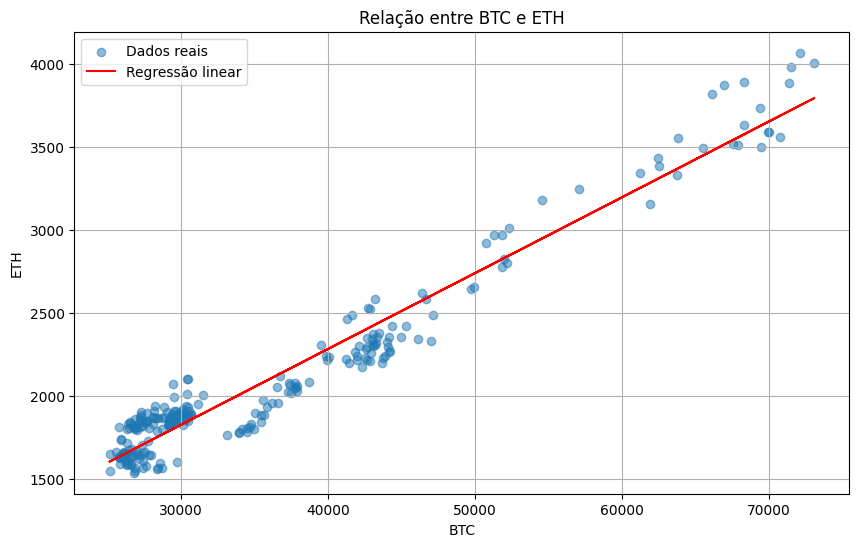

In [20]:
x = df_ativos['BTC'].values
y = df_ativos['ETH'].values

coef = analise_qualidade_regressao(x, y, "BTC vs ETH")
f = lambda x: coef[0] + coef[1] * x

plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.5, label='Dados reais')
plt.plot(x, f(x), color='red', label='Regressão linear')
plt.title('Relação entre BTC e ETH')
plt.xlabel('BTC')
plt.ylabel('ETH')
plt.legend()
plt.grid()
plt.show()

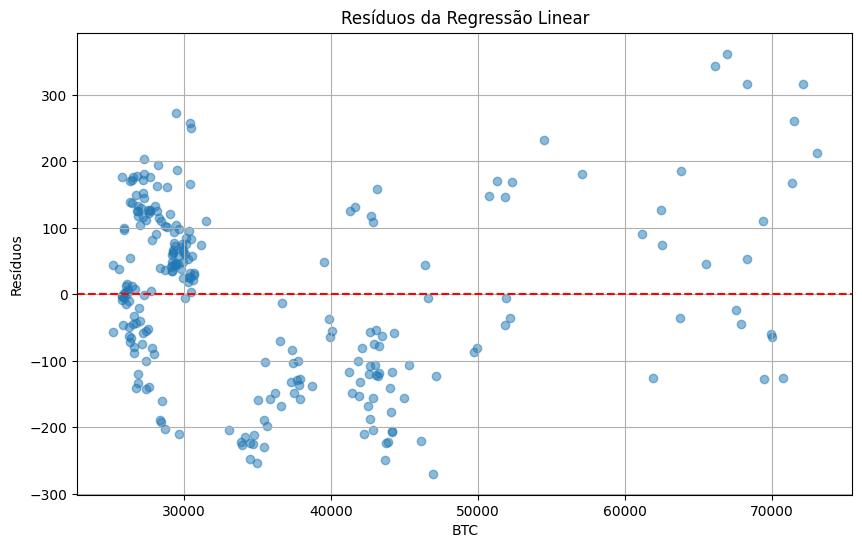

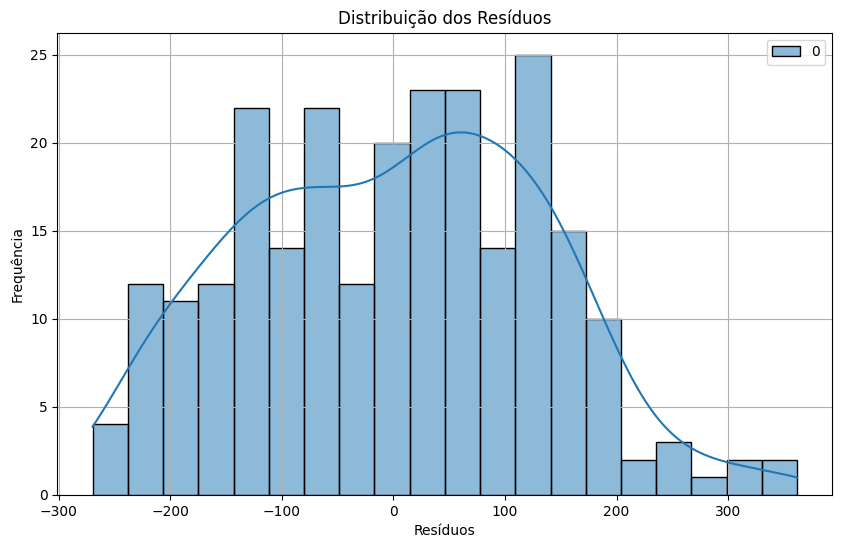

In [24]:
residuos = y - f(x)

plt.figure(figsize=(10, 6))
plt.scatter(x, residuos, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title('Resíduos da Regressão Linear')
plt.xlabel('BTC')
plt.ylabel('Resíduos')
plt.grid()
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(residuos, bins=20, kde=True)
plt.title('Distribuição dos Resíduos')
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.grid()
plt.show()


In [28]:
pd.DataFrame(residuos, columns=['Resíduos']).describe()

,Resíduos
count,2.490000e+02
mean,1.095777e-13
std,1.322643e+02
min,-2.695446e+02
25%,-1.065748e+02
50%,4.547278e+00
75%,1.021518e+02
max,3.619135e+02


O modelo se ajustou bem aos dados, com um R² de 0.95 e passando proximo aos pontos. Os residuos tem média 0 e parecem aleatórios, com distribuição aproximadamente normal.

## **Exercício 3:** Calcule a reta que descreve o preço de fechamento do BTC em função do preço de fechamento dos demais ativos coletados no Exercício 1 utilizando um MPRL múltiplo determinado pelo método de mínimos quadrados. Analise a qualidade das métricas numéricas e visuais dessa aproximação.

**Dica:** Utilize as funções confeccionadas em sala de aula.

C:\Users\joaov\AppData\Local\Temp\ipykernel_13252\1427530729.py:100: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  x = df_ativos.drop(columns=['BTC']).values
C:\Users\joaov\AppData\Local\Temp\ipykernel_13252\1427530729.py:101: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  x_cols = list(df_ativos.drop(columns=['BTC']).columns.get_level_values(0))



  SQE   = 1195915956.8493
  STQT  = 36687175410.0601
  SQR   = 35491259453.2107
  R²    = 0.9674
  Interpretação: O modelo explica muito bem a variação de Y.


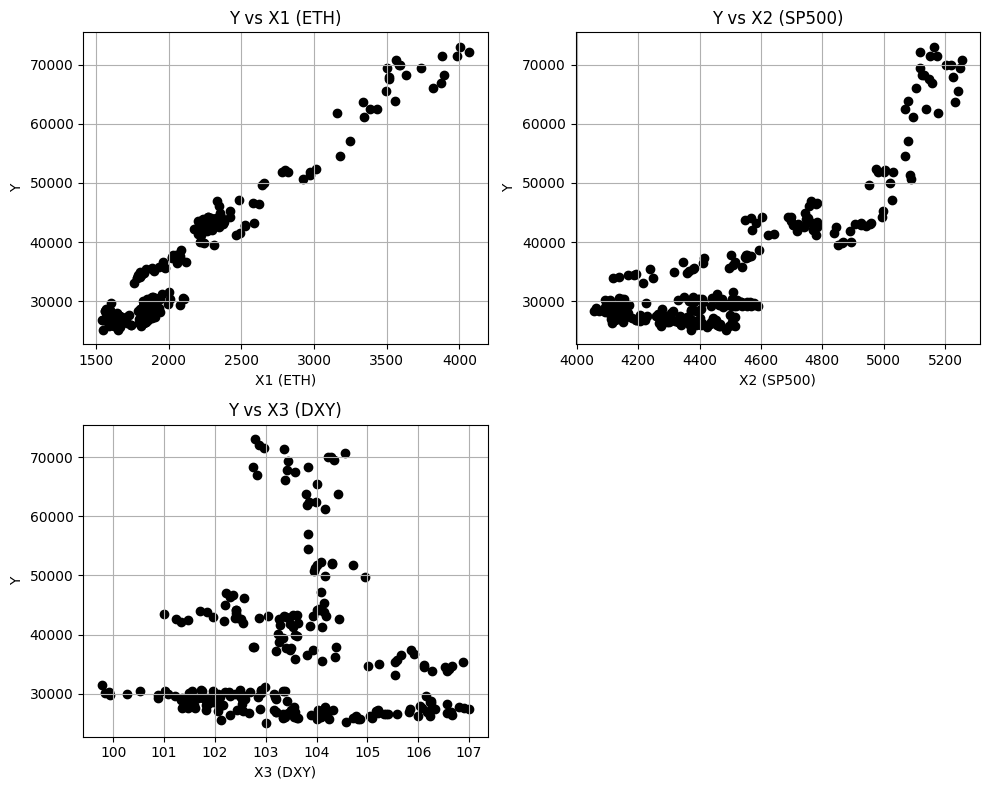

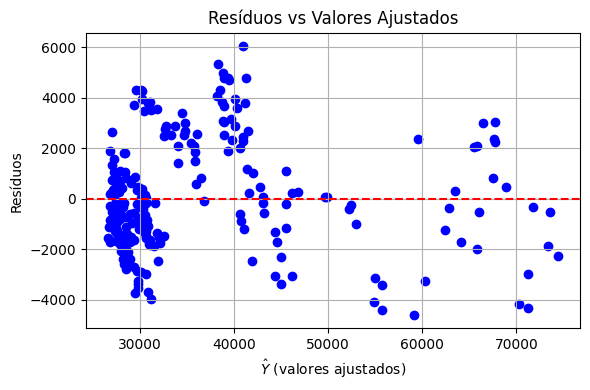

In [68]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import t

def analise_qualidade_regressao_multipla_com_tabela_e_scatter(X, Y, x_cols, alpha=0.05):
    n = X.shape[0]

    # Adiciona coluna de 1s para o intercepto
    X_aug = np.column_stack((np.ones(n), X))
    p = X_aug.shape[1]  # Número de parâmetros (inclui intercepto)

    # Estimação dos coeficientes
    beta = np.linalg.inv(X_aug.T @ X_aug) @ (X_aug.T @ Y)
    beta = np.squeeze(beta)  # Remove dimensões extras
    Y_hat = X_aug @ beta
    Y_bar = np.mean(Y)

    # Resíduos
    residuo = Y - Y_hat

    # SQE, STQT, SQR
    SQE = np.sum((Y - Y_hat)**2)
    STQT = np.sum((Y - Y_bar)**2)
    SQR = STQT - SQE
    R2 = SQR / STQT

    # Erro padrão residual
    s2 = SQE / (n - p)

    # Matriz de variâncias dos coeficientes
    var_beta = np.diag(s2 * np.linalg.inv(X_aug.T @ X_aug))
    se_beta = np.sqrt(var_beta)

    # Estatísticas t e p-valores
    t_stats = beta / se_beta
    p_valores = 2 * (1 - t.cdf(np.abs(t_stats), df=n - p))

    # Construção da tabela de resultados
    nomes = ['Intercepto'] + [f'X{j+1} ({x_cols[j]})' for j in range(X.shape[1])]
    tabela_resultados = pd.DataFrame({
        'Coeficiente (β̂)': beta,
        'Erro Padrão': se_beta,
        't-valor': t_stats,
        'p-valor': p_valores
    }, index=nomes)

    # Impressão dos resultados gerais
    print(f"\n  SQE   = {SQE:.4f}")
    print(f"  STQT  = {STQT:.4f}")
    print(f"  SQR   = {SQR:.4f}")
    print(f"  R²    = {R2:.4f}")

    print("  Interpretação:", end=" ")
    if R2 > 0.8:
        print("O modelo explica muito bem a variação de Y.")
    elif R2 > 0.5:
        print("O modelo explica razoavelmente a variação de Y.")
    elif R2 > 0.2:
        print("O modelo tem pouca capacidade explicativa.")
    else:
        print("O modelo linear praticamente não explica a variação de Y.")

    # Gráficos de dispersão entre Y e cada Xj
    num_cols = X.shape[1]
    cols = 2
    rows = int(np.ceil(num_cols / cols))

    fig, axs = plt.subplots(rows, cols, figsize=(5 * cols, 4 * rows))
    axs = axs.flatten()

    for j in range(num_cols):
        axs[j].scatter(X[:, j], Y, color='black')
        axs[j].set_title(f'Y vs {nomes[j+1]}')
        axs[j].set_xlabel(f'{nomes[j+1]}')
        axs[j].set_ylabel('Y')
        axs[j].grid(True)

    # Remove subplots extras, se houver
    for j in range(num_cols, len(axs)):
        fig.delaxes(axs[j])

    plt.tight_layout()
    plt.show()

    # 🔥 NOVO: Gráfico de resíduos vs valores ajustados
    plt.figure(figsize=(6, 4))
    plt.scatter(Y_hat, residuo, color='blue')
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel(r'$\hat{Y}$ (valores ajustados)')
    plt.ylabel('Resíduos')
    plt.title('Resíduos vs Valores Ajustados')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return beta, residuo, tabela_resultados


x = df_ativos.drop(columns=['BTC']).values
x_cols = list(df_ativos.drop(columns=['BTC']).columns.get_level_values(0))
y = df_ativos['BTC'].values.ravel()
beta, residuo, tabela_resultados = analise_qualidade_regressao_multipla_com_tabela_e_scatter(x, y, x_cols=x_cols)

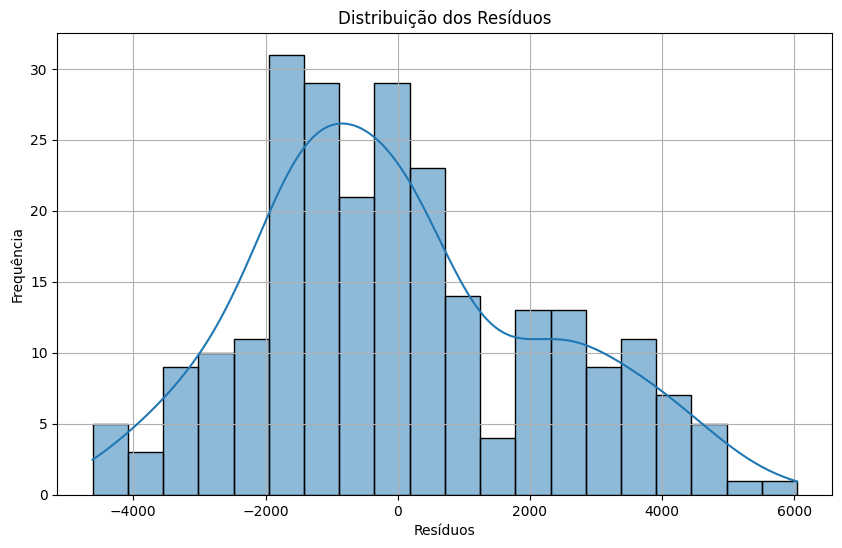

In [73]:
plt.figure(figsize=(10, 6))
sns.histplot(residuo, bins=20, kde=True)
plt.title('Distribuição dos Resíduos')
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.grid()
plt.show()

In [69]:
tabela_resultados

,Coeficiente (β̂),Erro Padrão,t-valor,p-valor
Intercepto,-106878.689469,9520.764050,-11.225852,0.000000e+00
X1 (ETH),17.543553,0.457132,38.377462,0.000000e+00
X2 (SP500),7.261382,0.814717,8.912763,0.000000e+00
X3 (DXY),707.249848,90.407794,7.822886,1.538769e-13


In [70]:
df_ativos.describe()

Price,BTC,ETH,SP500,DXY
Ticker,BTC-USD,ETH-USD,^GSPC,DX-Y.NYB
count,249.000000,249.000000,249.000000,249.000000
mean,36374.978006,2119.469228,4528.005458,103.486868
std,12162.736489,570.120216,318.377934,1.570617
min,25124.675781,1539.612427,4055.989990,99.769997
25%,27525.339844,1805.953735,4288.390137,102.389999
50%,30271.130859,1889.703369,4465.479980,103.419998
75%,42658.667969,2269.038086,4746.750000,104.239998
max,73083.500000,4066.445068,5254.350098,107.000000


Aqui temos um resultado interessante. O modelo se ajustou melhor que o modelo anterior, com um R² de 0.98. Os resíduos tem média 0 e parecem aleatórios, com distribuição aproximadamente normal (aparentemente "mais normal" que a anterior, mas com variância maior). 

Uma coisa interessante de notar é que o maior coeficiente foi o do DXY, o que pode dar a falsa impressão de que o DXY é o ativo que mais influencia o preço do BTC, mas isso não é verdade. Podemos observar que o preço do DXY é muito menor do que o ETH (20x menor) e o SP500 (40x menor). Isso reflete no p-valor, onde ele é o que tem mais chance de ser 0.

## **Exercício 4:** Calcule a reta que descreve o preço de fechamento do ETH em função do preço de fechamento dos ativos SP500 e DXY coletados no Exercício 1 utilizando um MPRL múltiplo determinado pelo método de mínimos quadrados.

(a) Analise a qualidade das métricas numéricas e visuais dessa aproximação.

(b) Colete valores de 02 a 10 de abril de 2024 para os ativos coletados no Exercício 1 e os armazene em um *dataframe* ```df_teste```.

(c) Utilizando valores de SP500 e DXY referente ao período mencionado no item (b) anterior, estime os valores de ETH.


  SQE   = 23358878.3667
  STQT  = 80609190.9417
  SQR   = 57250312.5750
  R²    = 0.7102
  Interpretação: O modelo explica razoavelmente a variação de Y.


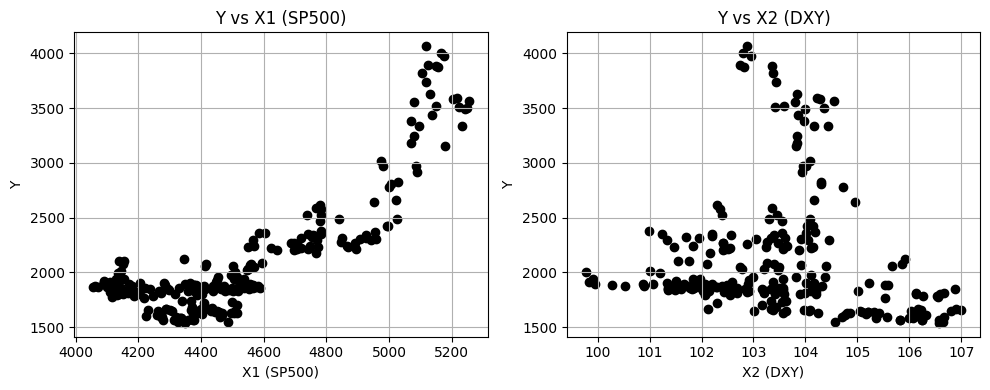

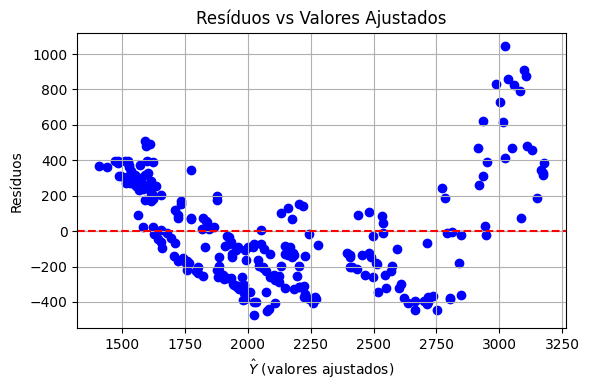

,Coeficiente (β̂),Erro Padrão,t-valor,p-valor
Intercepto,-1530.798557,1324.300943,-1.155930,0.248831
X1 (SP500),1.498949,0.061470,24.385113,0.000000
X2 (DXY),-30.312863,12.460483,-2.432720,0.015700


In [74]:
x_cols = ['SP500', 'DXY']
x = df_ativos[x_cols].values
y = df_ativos['ETH'].values.ravel()
beta, residuo, tabela_resultados = analise_qualidade_regressao_multipla_com_tabela_e_scatter(x, y, x_cols=x_cols)
tabela_resultados

Por mais que a métrica diga que o modelo se ajustou razoavelmente. Podemos observar que os residuos não são aleatórios (parecem uma curva quadrática). Isso pode indicar que esse modelo não é o ideal para prever o preço do ETH.


  SQE   = 534.8764
  STQT  = 19614.2494
  SQR   = 19079.3730
  R²    = 0.9727
  Interpretação: O modelo explica muito bem a variação de Y.


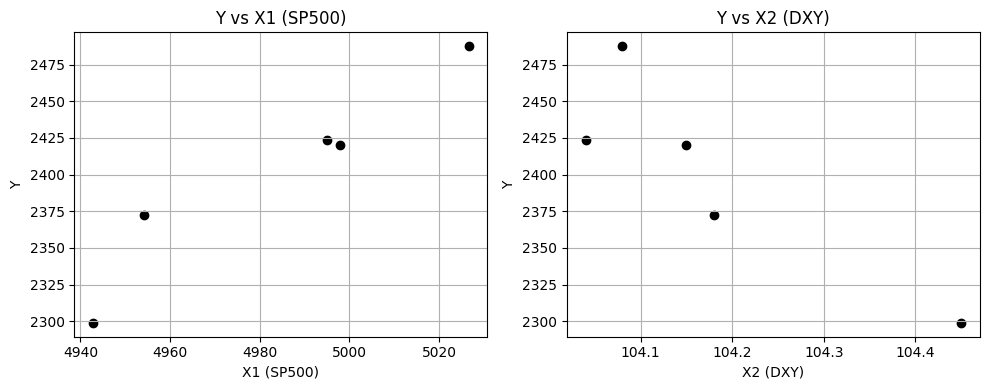

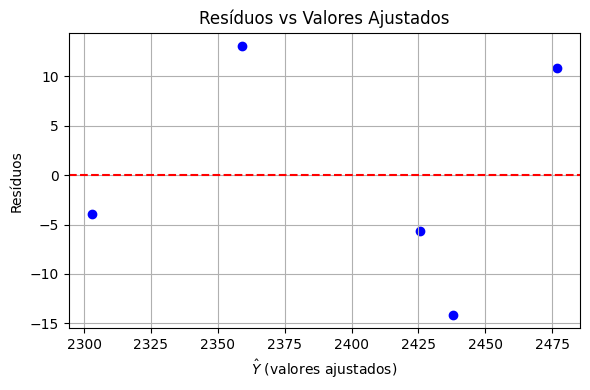

,Coeficiente (β̂),Erro Padrão,t-valor,p-valor
Intercepto,10805.588624,10147.807689,1.064820,0.398497
X1 (SP500),1.418813,0.385302,3.682338,0.066479
X2 (DXY),-148.546204,82.252447,-1.805979,0.212672


In [82]:
from datetime import date
df_teste = df_ativos.loc[(df_ativos.index > date(2024, 2, 4)) & (df_ativos.index < date(2024, 2, 10))]
x_teste = df_teste[x_cols].values
y_teste = df_teste['ETH'].values.ravel()
beta, residuo, tabela_resultados = analise_qualidade_regressao_multipla_com_tabela_e_scatter(x_teste, y_teste, x_cols=x_cols)
tabela_resultados

Observe que os coeficientes são completamente diferentes do modelo anterior, mas para a amostra de teste, o modelo se saiu muito bem.

In [93]:
import numpy as np
import matplotlib.pyplot as plt
import math

def graficos(X, y, nomes, beta):
    """
    Plota:
      1) Dispersão de y vs cada coluna de X, usando nomes fornecidos.
      2) Resíduos vs valores ajustados (considerando intercepto em beta).
    
    Parâmetros:
    - X: array de shape (n, p), sem coluna de 1s.
    - y: vetor (n,).
    - nomes: lista de strings de comprimento p+1, onde nomes[0] é 'Intercepto' e
             nomes[1:] são os nomes das colunas de X.
    - beta: vetor de coeficientes de comprimento p+1, incluindo intercepto.
    """
    # 1) Gráficos de dispersão Y vs Xj
    num_cols = X.shape[1]
    cols = 2
    rows = math.ceil(num_cols / cols)

    fig, axs = plt.subplots(rows, cols, figsize=(5 * cols, 4 * rows))
    axs = axs.flatten()

    for j in range(num_cols):
        axs[j].scatter(X[:, j], y, color='black')
        axs[j].set_title(f'Y vs {nomes[j+1]}')
        axs[j].set_xlabel(nomes[j+1])
        axs[j].set_ylabel('Y')
        axs[j].grid(True)

    # Remove eixos extras
    for idx in range(num_cols, len(axs)):
        fig.delaxes(axs[idx])

    plt.tight_layout()
    plt.show()

    # 2) Gráfico de resíduos vs valores ajustados
    # Adiciona coluna de 1s para intercepto
    n = X.shape[0]
    X_aug = np.column_stack((np.ones(n), X))
    Y_hat = X_aug @ beta
    residuo = y - Y_hat

    plt.figure(figsize=(6, 4))
    plt.scatter(Y_hat, residuo, color='blue')
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel(r'$\hat{Y}$ (valores ajustados)')
    plt.ylabel('Resíduos')
    plt.title('Resíduos vs Valores Ajustados')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def metricas(x, y, beta):
    y_pred = x @ beta[1:] + beta[0]
    erro = y - y_pred
    RMSE = np.sqrt(np.mean(erro**2))
    MAE = np.mean(np.abs(erro))
    R2 = 1 - (np.sum(erro**2) / np.sum((y - np.mean(y))**2))
    Erro_Médio = np.mean(erro)
    print(f"RMSE: {RMSE:.4f}")
    print(f"MAE: {MAE:.4f}")
    print(f"R²: {R2:.4f}")
    print(f"Erro Médio: {Erro_Médio:.4f}")

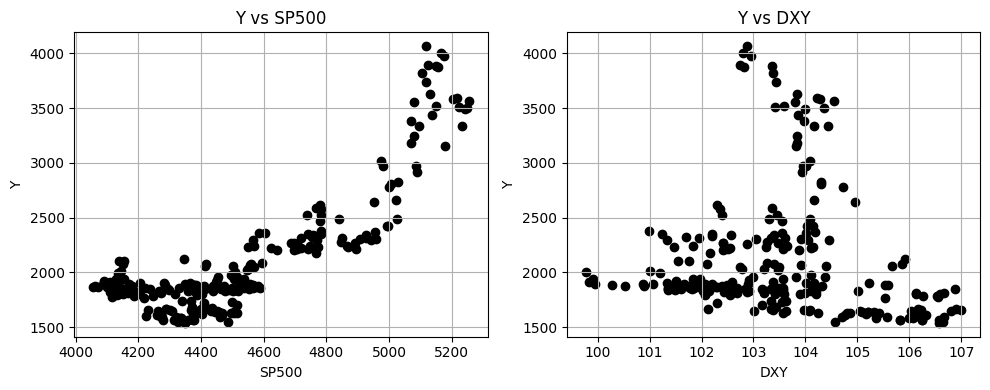

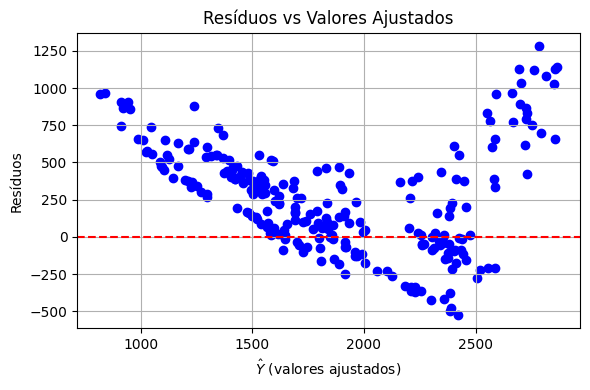

In [88]:
graficos(x, y, ['Intercepto'] + x_cols, beta)

In [94]:
metricas(x, y, beta)

RMSE: 444.1978
MAE: 347.8387
R²: 0.3905
Erro Médio: 262.0674


Os resíduos continuam em forma de curva quadrática. Não só isso, como sequer a média dos resíduos é 0. Isso indica que o modelo não é bom para prever o preço do ETH.

## **Exercício 5:** Refaça o exercício anterior considerando prever o preço do BTC em vez do preço da ETH.


  SQE   = 479005.0995
  STQT  = 13076851.4268
  SQR   = 12597846.3273
  R²    = 0.9634
  Interpretação: O modelo explica muito bem a variação de Y.


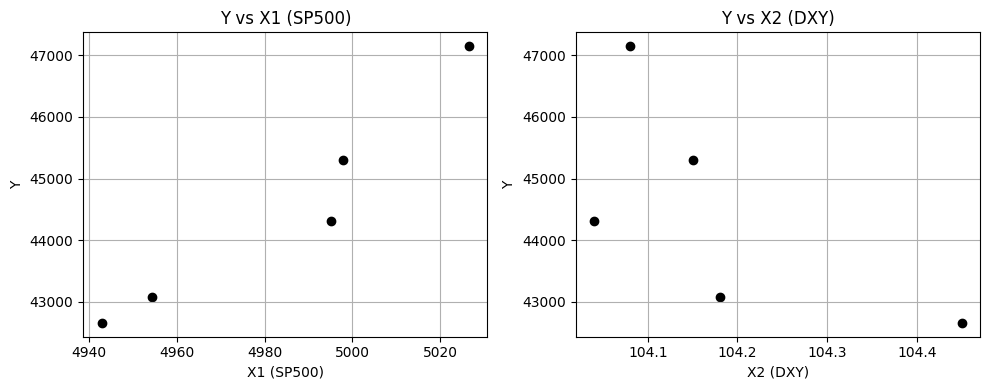

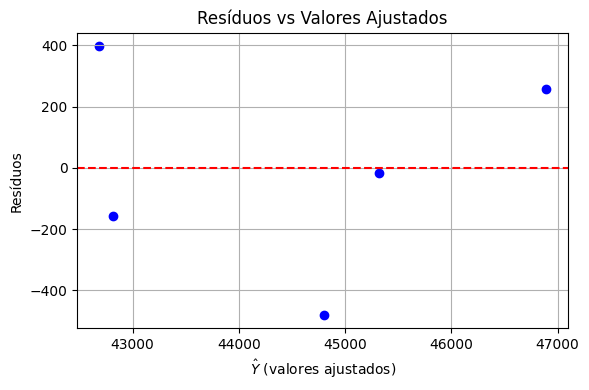

,Coeficiente (β̂),Erro Padrão,t-valor,p-valor
Intercepto,-589967.907080,303679.574623,-1.942732,0.191525
X1 (SP500),62.357285,11.530415,5.408070,0.032532
X2 (DXY),3107.347041,2461.456585,1.262402,0.334069


In [95]:
df_teste = df_ativos.loc[(df_ativos.index > date(2024, 2, 4)) & (df_ativos.index < date(2024, 2, 10))]
x_cols = ['SP500', 'DXY']
x_teste = df_teste[x_cols].values
y_teste = df_teste['BTC'].values.ravel()
beta, residuo, tabela_resultados = analise_qualidade_regressao_multipla_com_tabela_e_scatter(x_teste, y_teste, x_cols=x_cols)
tabela_resultados

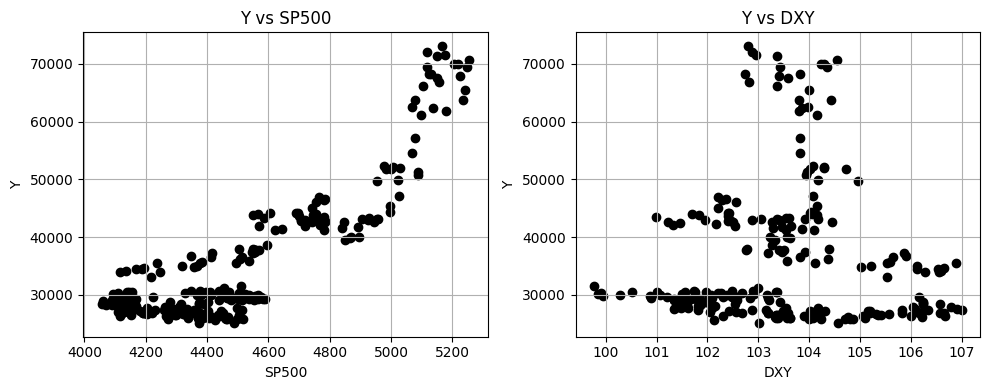

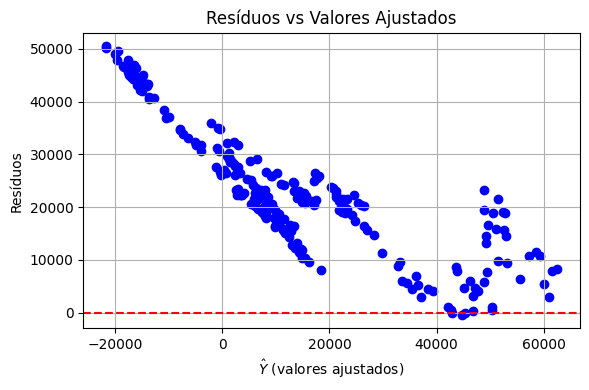

RMSE: 25290.4842
MAE: 22424.3952
R²: -3.3411
Erro Médio: 22419.1461


In [96]:
x = df_ativos[x_cols].values
y = df_ativos['BTC'].values.ravel()
graficos(x, y, ['Intercepto'] + x_cols, beta)
metricas(x, y, beta)

O resultado ficou muito ruim, podemos observar inclusive um R² negativo (seria melhor prever o preço do BTC com a média). A distribuição dos resíduos parece "linear" e a média dos resíduos é aproximadamente 22419, o que é bem diferente de 0. Isso indica que o modelo não é bom para prever o preço do BTC.

## **Exercício 6:** Adicione duas variáveis ao dataframe ```df_ativos``` que consistem na resposta logarítmica dos valores de fechamento do BTC e da ETH.

(a) Ajuste um modelo de regressão linear com $\log(\text{BTC})$ como variável resposta e $\log(\text{ETH})$ como preditor.

(b) Compare com o modelo linear simples do Exercício 2.

(c) Qual teve melhor ajuste? Os resíduos são mais apropriados? Justifique.

In [104]:
df_ativos.columns = ['BTC', 'ETH', 'SP500', 'DXY']
df_ativos['BTC_log'] = np.log(df_ativos['BTC'])
df_ativos['ETH_log'] = np.log(df_ativos['ETH'])
df_ativos

,BTC,ETH,SP500,DXY,BTC_log,ETH_log
date,,,,,,
2023-04-03,27790.220703,1810.297119,4124.509766,102.089996,10.232439,7.501246
2023-04-04,28168.089844,1871.005127,4100.600098,101.589996,10.245945,7.534231
2023-04-05,28177.984375,1909.114014,4090.379883,101.849998,10.246296,7.554395
2023-04-06,28044.140625,1872.922607,4105.020020,101.820000,10.241535,7.535255
2023-04-10,29652.980469,1911.207520,4109.109863,102.580002,10.297318,7.555491
...,...,...,...,...,...,...
2024-03-22,63778.761719,3333.687988,5234.180176,104.430000,11.063176,8.111834
2024-03-25,69958.812500,3590.883789,5218.189941,104.230003,11.155662,8.186154
2024-03-26,69987.835938,3587.504883,5203.580078,104.290001,11.156077,8.185212


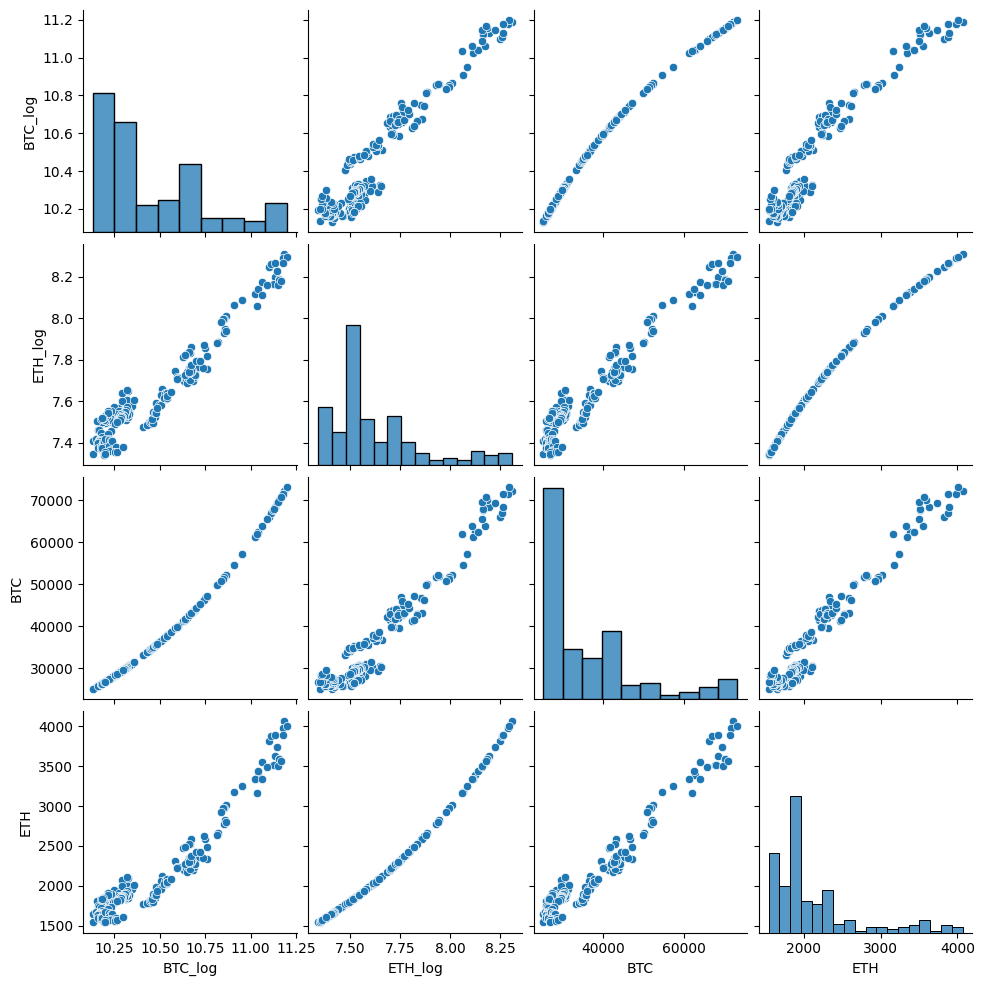

In [107]:
sns.pairplot(data=df_ativos[['BTC_log', 'ETH_log', 'BTC', 'ETH']])
plt.show()

In [109]:
x = df_ativos['ETH_log'].values.ravel()
y = df_ativos['BTC_log'].values.ravel()
coef = analise_qualidade_regressao(x, y, "ETH vs BTC (log)")


🔎 Análise do caso ETH vs BTC (log)
  β̂₀ = 1.2554, β̂₁ = 1.2059
  SQE   = 1.6476
  STQT  = 20.8086
  SQR   = 19.1610
  R²    = 0.9208
  Interpretação: O modelo explica muito bem a variação de Y.



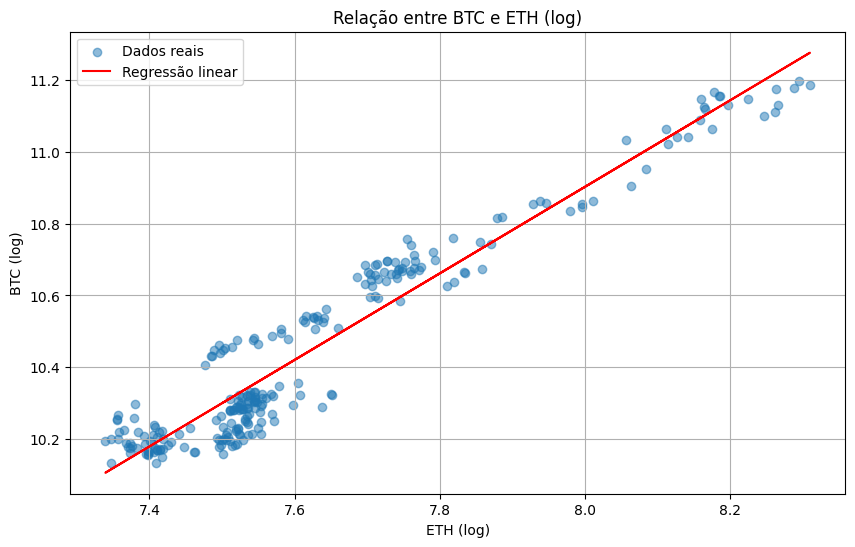

In [110]:
f = lambda x: coef[0] + coef[1] * x
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.5, label='Dados reais')
plt.plot(x, f(x), color='red', label='Regressão linear')
plt.title('Relação entre BTC e ETH (log)')
plt.xlabel('ETH (log)')
plt.ylabel('BTC (log)')
plt.legend()
plt.grid()
plt.show()

RMSE: 2919.7556
MAE: 2469.6927
R²: 0.9421
Erro Médio: 89.8951


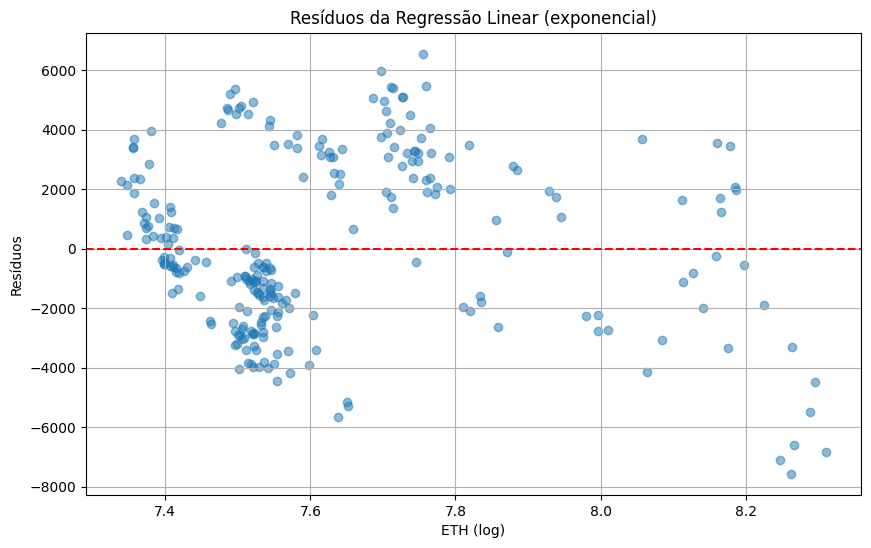

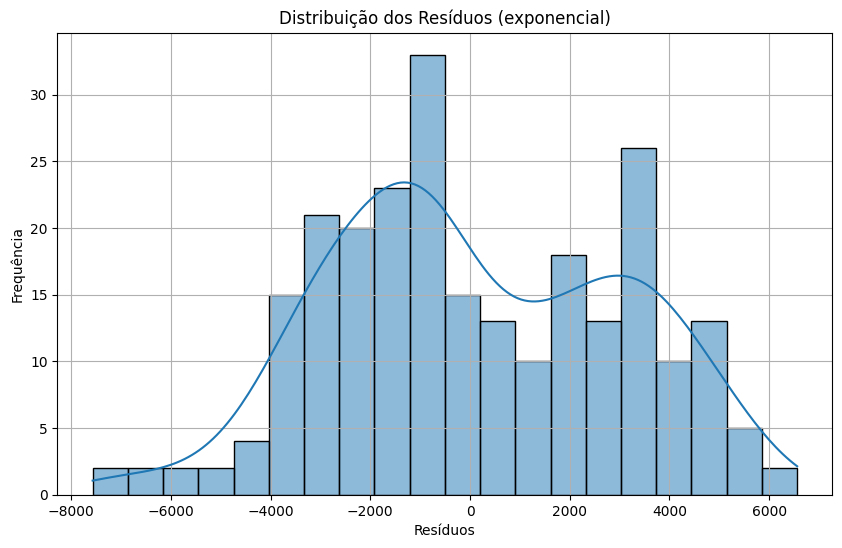

In [113]:
def metricas_exp(x, y, beta):
    y_pred = x *beta[1] + beta[0]
    y = np.exp(y)
    y_pred = np.exp(y_pred)
    erro = y - y_pred
    RMSE = np.sqrt(np.mean(erro**2))
    MAE = np.mean(np.abs(erro))
    R2 = 1 - (np.sum(erro**2) / np.sum((y - np.mean(y))**2))
    Erro_Médio = np.mean(erro)
    print(f"RMSE: {RMSE:.4f}")
    print(f"MAE: {MAE:.4f}")
    print(f"R²: {R2:.4f}")
    print(f"Erro Médio: {Erro_Médio:.4f}")

    # plota os resíduos
    plt.figure(figsize=(10, 6))
    plt.scatter(x, erro, alpha=0.5)
    plt.axhline(0, color='red', linestyle='--')
    plt.title('Resíduos da Regressão Linear (exponencial)')
    plt.xlabel('ETH (log)')
    plt.ylabel('Resíduos')
    plt.grid()
    plt.show()

    # histograma dos resíduos
    plt.figure(figsize=(10, 6))
    sns.histplot(erro, bins=20, kde=True)
    plt.title('Distribuição dos Resíduos (exponencial)')
    plt.xlabel('Resíduos')
    plt.ylabel('Frequência')
    plt.grid()
    plt.show()

metricas_exp(x, y, coef)

## **Exercício 7:** Investigue como a presença de covariáveis altamente correlacionadas afeta o desempenho e a confiabilidade de um modelo de regressão linear múltipla. Especificamente, avalie o impacto da **multicolinearidade** entre variáveis explicativas no MPRL.

**(a)** Crie uma nova variável chamada `ETH_noise`, somando um pequeno ruído gaussiano ao preço de fechamento do Ethereum:


$$ \text{ETH}_\text{noise} = \text{ETH}+\text{noise}. $$

**(b)** Ajuste um modelo de regressão linear múltipla para descrever o preço do Bitcoin (BTC) em função de ETH e ETH_noise:

$$ \text{BTC} ≈ \beta_0 + +\beta_1\cdot \text{ETH} + \beta_2 \cdot \text{ETH}_\text{noise}. $$

**(c)** Analise e discuta:

- O valor de $ R^2 $ continua alto?  
- Os **coeficientes estimados** para `ETH` e `ETH_noise` são razoáveis ou parecem instáveis?  
- Algum coeficiente **perde significância estatística**?
- O que isso diz sobre a confiabilidade do modelo?

---

### 💬 Reflexão final:

> "Por que a presença de variáveis redundantes (altamente correlacionadas) pode ser prejudicial para o modelo de regressão linear? Como poderíamos mitigar esse problema?"

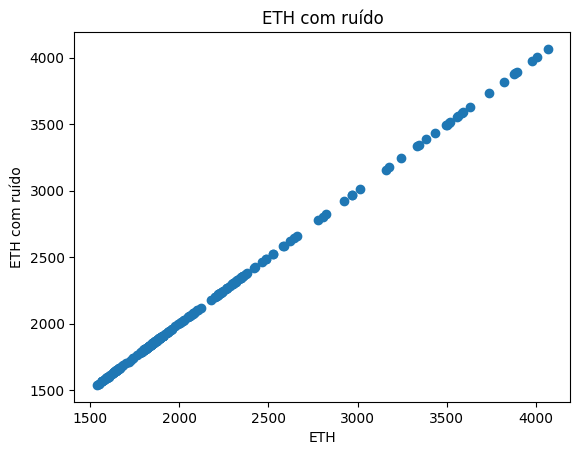

In [121]:
df_ativos['ETH_noise'] = df_ativos['ETH'] + np.random.normal(0, 1, len(df_ativos))
plt.scatter(df_ativos['ETH'], df_ativos['ETH_noise'])
plt.xlabel('ETH')
plt.ylabel('ETH com ruído')
plt.title('ETH com ruído')
plt.show()


  SQE   = 1953451349.3853
  STQT  = 36687175410.0601
  SQR   = 34733724060.6747
  R²    = 0.9468
  Interpretação: O modelo explica muito bem a variação de Y.


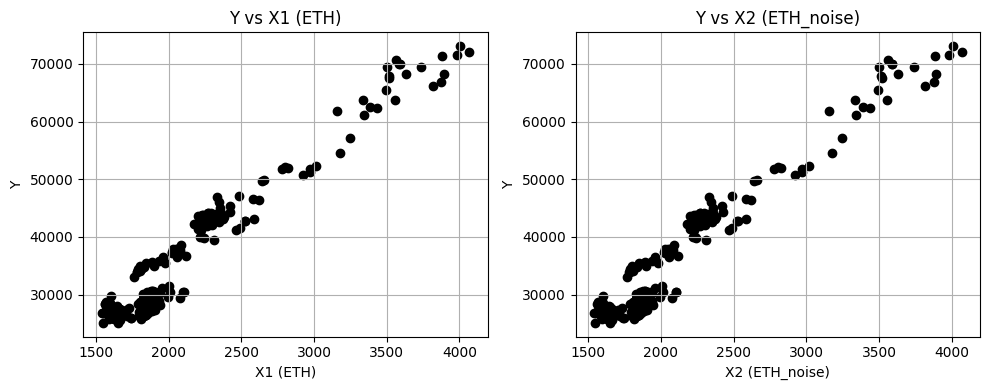

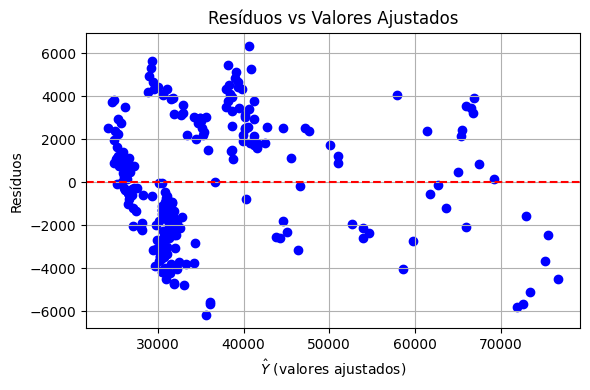

,Coeficiente (β̂),Erro Padrão,t-valor,p-valor
Intercepto,-7447.221132,695.754254,-10.703810,0.000000
X1 (ETH),329.902148,189.692449,1.739142,0.083261
X2 (ETH_noise),-309.215590,189.732095,-1.629748,0.104434


In [122]:
x_cols = ['ETH', 'ETH_noise']
x = df_ativos[x_cols].values
y = df_ativos['BTC'].values.ravel()
beta, residuo, tabela_resultados = analise_qualidade_regressao_multipla_com_tabela_e_scatter(x, y, x_cols=x_cols)
tabela_resultados

Por mais que o R2 esteja praticamente o mesmo, podemos observar que os coeficientes estão completamente diferentes. Uma coisa interessante de notar é que o coeficiente do ETH_noise e ETH estão praticamente se anulando (329.9 - 309.2 = 20.7), o que parece bem instável. Nesse caso nenhum dos coeficientes perde significância, mas caso aumentássemos o ruído, o coeficiente do ETH_noise perderá significância (como mostraremos abaixo).


  SQE   = 1974158702.1758
  STQT  = 36687175410.0601
  SQR   = 34713016707.8843
  R²    = 0.9462
  Interpretação: O modelo explica muito bem a variação de Y.


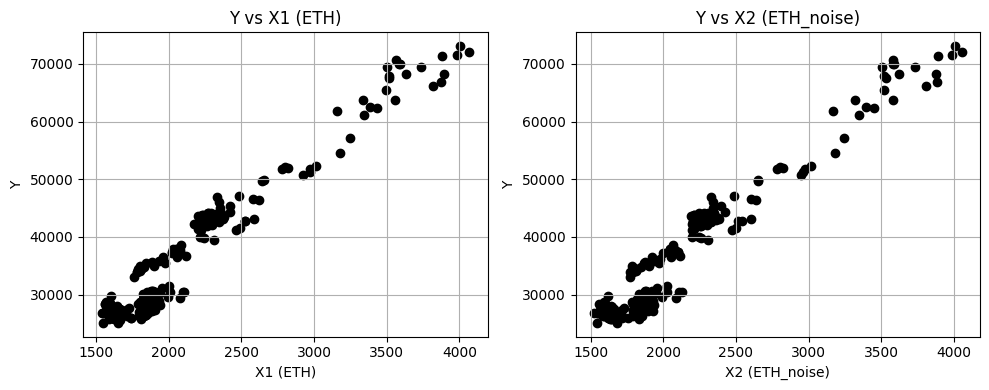

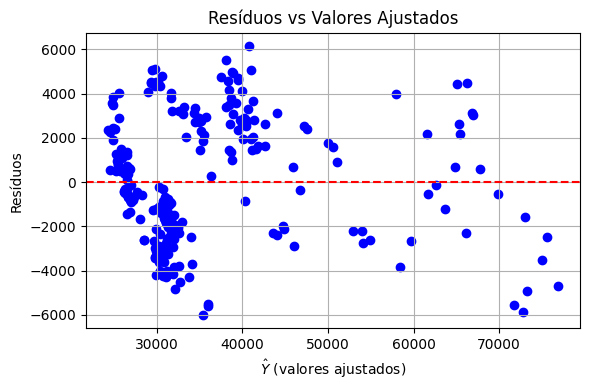

,Coeficiente (β̂),Erro Padrão,t-valor,p-valor
Intercepto,-7609.448846,692.483106,-10.988642,0.000000
X1 (ETH),23.279596,11.557961,2.014161,0.045081
X2 (ETH_noise),-2.526518,11.546879,-0.218805,0.826983


In [132]:
x_copy = x.copy()
x_copy[:, 1] = x[:, 0] + np.random.normal(0, 15, len(x))
beta, residuo, tabela_resultados = analise_qualidade_regressao_multipla_com_tabela_e_scatter(x_copy, y, x_cols=x_cols)
tabela_resultados

Se isso acontecer, os coeficientes ficam menos confiáveis, pois:
1. Fica dificil de saber qual variável está influenciando mais o preço do BTC.
2. Risco de overfitting, pois o modelo pode estar se ajustando para casos que não são reais.
3. Instabilidade dos coeficientes, pois eles podem mudar muito com pequenas mudanças nos dados.

Para mitigar esse problema, podemos:
1. Remover variáveis redundantes.
2. Utilizar técnicas de regularização, como Lasso ou Ridge, que penalizam a complexidade do modelo.
3. Utilizar PCA (Análise de Componentes Principais) para reduzir a dimensionalidade dos dados, mantendo a maior parte da variância. 